In [5]:
# Data Scraping and Analysis

In [2]:
import requests
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("/Users/brblove/Library/CloudStorage/OneDrive-Personal/University Life staff/IT Portfolio Projects/Projects/Salary_Project/Salary Prediction of Data Professions.csv")

In [6]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT
0,TOMASA,ARMEN,F,5-18-2014,01/07/2016,Analyst,21.0,44570,Finance
1,ANNIE,NaN,F,NaN,01/07/2016,Associate,NaN,89207,Web
2,OLIVE,ANCY,F,7-28-2014,01/07/2016,Analyst,21.0,40955,Finance
3,CHERRY,AQUILAR,F,04/03/2013,01/07/2016,Analyst,22.0,45550,IT
4,LEON,ABOULAHOUD,M,11-20-2014,01/07/2016,Analyst,NaN,43161,Operations


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIRST NAME    2639 non-null   object 
 1   LAST NAME     2637 non-null   object 
 2   SEX           2639 non-null   object 
 3   DOJ           2638 non-null   object 
 4   CURRENT DATE  2639 non-null   object 
 5   DESIGNATION   2639 non-null   object 
 6   AGE           2636 non-null   float64
 7   SALARY        2639 non-null   int64  
 8   UNIT          2639 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 185.7+ KB


In [10]:
df.describe()

,AGE,SALARY
count,2636.000000,2639.000000
mean,24.756449,58136.678287
std,3.908228,36876.956944
min,21.000000,40001.000000
25%,22.000000,43418.000000
50%,24.000000,46781.000000
75%,25.000000,51401.500000
max,45.000000,388112.000000


In [12]:
df_sorted = df.sort_values(by='AGE', ascending=True)

<Figure size 1000x600 with 0 Axes>

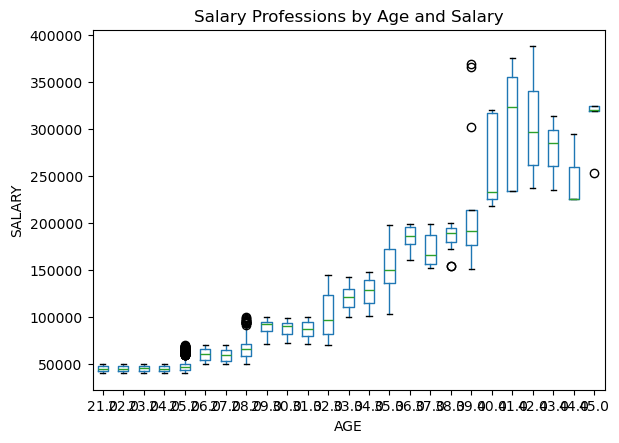

In [14]:
# Box plot to summarize the statistics
plt.figure(figsize=(10,6))
df.boxplot(column='SALARY',by='AGE',grid=False)
           

#set the title and labels
plt.title('Salary Professions by Age and Salary')
plt.suptitle('') #supress the default title to avoid overlapping
plt.xlabel('AGE')
plt.ylabel('SALARY')

#display the plot
plt.show()

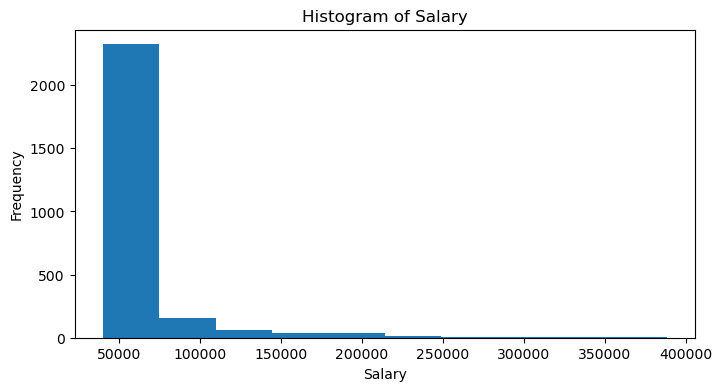

In [50]:
# Create the histogram
plt.figure(figsize=(8, 4))
plt.hist(x=df['SALARY'], bins=10)

# Set the title and labels
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

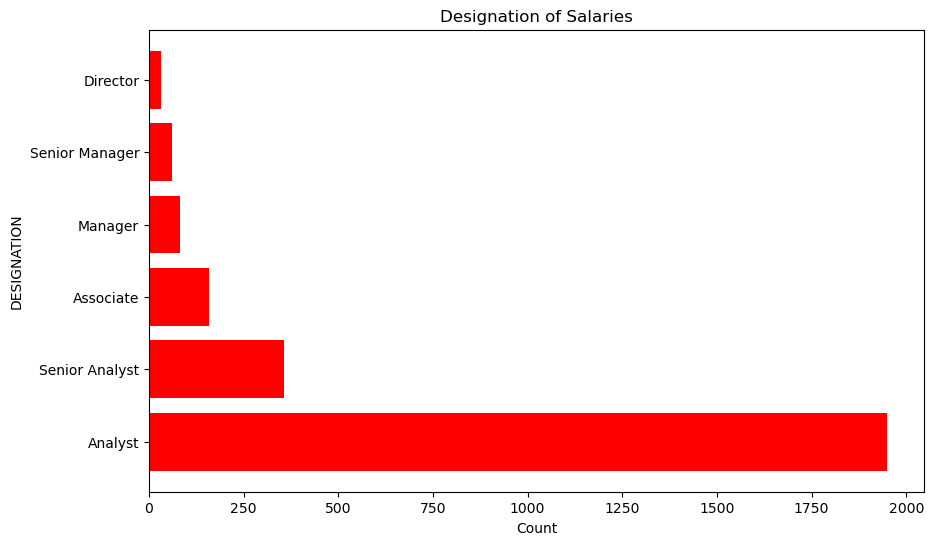

In [75]:
# count the occurances in each designation
designation_counts = df['DESIGNATION'].value_counts()

#create horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(designation_counts.index, designation_counts.values, color='red')
plt.xlabel('Count')
plt.ylabel('DESIGNATION')
plt.title('Designation of Salaries')

#plot chart
plt.show()

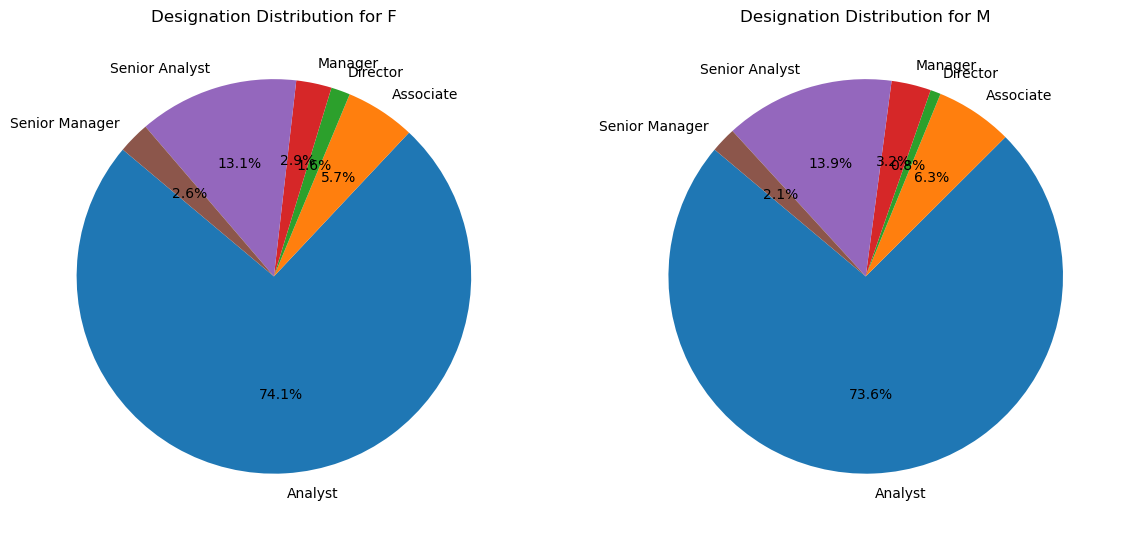

In [77]:
#pie chart for percentage of gender or sex
# count the occurances in each designation
designation_counts = df['DESIGNATION'].value_counts()

# Group by 'SEX' and 'DESIGNATION' and count the occurrences
sex_designation_counts = df.groupby(['SEX', 'DESIGNATION']).size().unstack(fill_value=0)

# Plot pie charts for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, sex in enumerate(sex_designation_counts.index):
    axes[i].pie(sex_designation_counts.loc[sex], labels=sex_designation_counts.columns, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Designation Distribution for {sex}')

plt.show()